In [176]:
#Dependencies
import numpy as np
import pandas as pd
from pathlib import Path


In [133]:
#from sklearn.feature_extraction.text import CountVectorizer

In [246]:
#df = pd.read_csv('Kindle_Reviews.csv')
#df = pd.read_csv('kindle_review_updated.csv')
#df = pd.read_csv('data.csv')
df = pd.read_csv('Kindle_Reviews_latest.csv')
df.head()

,Unnamed: 0,overall,verified,reviewerID,asin,reviewText,summary,vote,newReviewTime
0,0,5,True,A8WQ7MAG3HFOZ,B000FA5KK0,"Love Max, always a fun twist",Five Stars,NaN,2016-09-16
1,1,5,True,A1E0MODSRYP7O,B000FA5KK0,"As usual for him, a good book",a good,NaN,2016-03-03
2,2,5,True,AFVJCR70132Z,B000FBFMHU,This book was well written and well edited. It...,Great book,NaN,2018-02-13
3,3,5,True,A35TPI5B6O08A0,B000FBFMHU,This true story is amazing. All the things he...,Amazing,NaN,2017-09-08
4,4,5,True,A25VQSS06RDWMJ,B000FBFMHU,It was a fun adventure to read.,Five Stars,NaN,2017-05-14


In [187]:
df.dtypes

Unnamed: 0          int64
actual_ratings      int64
verified             bool
reviewerID         object
asin               object
reviewText         object
summary            object
vote              float64
newReviewTime      object
reviewText_sws     object
dtype: object

In [196]:
#df['reviewText'] = df['reviewText'].astype('|S') 
df['reviewText'] = df['reviewText'].astype(pd.StringDtype())
df.dtypes

Unnamed: 0          int64
actual_ratings      int64
verified             bool
reviewerID         object
asin               object
reviewText         string
summary            object
vote              float64
newReviewTime      object
reviewText_sws     object
dtype: object

In [197]:
df.rename({'overall': 'actual_ratings'}, axis=1, inplace=True)

In [209]:
# checking and deleting null values from 
df['summary'].isnull().values.any()
df['summary'] = df['summary'].fillna('')

In [210]:
df['summary'].isnull().values.any()

False

In [205]:
df['summary'] = df['summary'].astype(pd.StringDtype())
df.dtypes

Unnamed: 0               int64
actual_ratings           int64
verified                  bool
reviewerID              object
asin                    object
reviewText              string
summary                 string
vote                   float64
newReviewTime           object
reviewText_sws          object
review_rating_score    float64
dtype: object

In [198]:
from pycaret.nlp import *
from pycaret.classification import *
import nltk
from nltk.corpus import stopwords


In [199]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


False

In [200]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [201]:
stop = stopwords.words('english')

In [202]:
#df['reviewText_sws'] = df['reviewText'].apply(lambda x: [item for item in str(x).split() if item not in stopwords.words('english')])
df['reviewText_sws'] = df['reviewText'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))

In [203]:
sid = SentimentIntensityAnalyzer()

In [204]:
scores = []

for i in df["reviewText"]:

    scores.append(sid.polarity_scores(i)["compound"])

df["review_rating_score"] = scores

In [211]:
scores_summary = []

for i in df["summary"]:

    scores_summary.append(sid.polarity_scores(i)["compound"])

df["summary_rating_score"] = scores_summary


In [212]:
df

,Unnamed: 0,actual_ratings,verified,reviewerID,asin,reviewText,summary,vote,newReviewTime,reviewText_sws,review_rating_score,summary_rating_score
0,0,5,True,A8WQ7MAG3HFOZ,B000FA5KK0,"b'Love Max, always a fun twist'",Five Stars,NaN,2016-09-16,"b'Love Max, always fun twist'",0.5106,0.0000
1,1,5,True,A1E0MODSRYP7O,B000FA5KK0,"b'As usual for him, a good book'",a good,NaN,2016-03-03,"b'As usual him, good book'",0.4404,0.4404
2,2,5,True,AFVJCR70132Z,B000FBFMHU,"b""This book was well written and well edited. ...",Great book,NaN,2018-02-13,"b""This book well written well edited. It faste...",0.7390,0.6249
3,3,5,True,A35TPI5B6O08A0,B000FBFMHU,b'This true story is amazing. All the things ...,Amazing,NaN,2017-09-08,b'This true story amazing. All things got away...,0.8591,0.5859
4,4,5,True,A25VQSS06RDWMJ,B000FBFMHU,b'It was a fun adventure to read.',Five Stars,NaN,2017-05-14,b'It fun adventure read.',0.6808,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
459266,459266,4,True,A2GCEOF7KVQK1U,B01HJCNGZ2,"b""Cute picture book for students in the primar...",CAT CITY CAPER,NaN,2016-11-16,"b""Cute picture book students primary grades. I...",-0.1788,0.0000
459267,459267,5,True,A3ETWQJ8WRQFHX,B01HJCNGZ2,"b'I love the three kittens, Charlie, Grace, an...","Kitties, Pirates and Dawg!",NaN,2016-08-09,"b'I love three kittens, Charlie, Grace, Sam. A...",0.9849,0.0000
459268,459268,5,True,ARKWPH17ITFGS,B01HJCNGZ2,"b""My son has read (and fallen in love) with se...",) I think this is the best book that Mr,NaN,2016-07-15,"b""My son read (and fallen love) several author...",0.9865,0.6369
459269,459269,5,True,AQ62OQDHMHBLY,B01HJCNGZ2,"b""This is a fun story about three cats in the ...",Cat Pirates!,NaN,2016-06-29,"b""This fun story three cats city decide want p...",0.9825,0.0000


In [213]:
df['length_summary'] = df['summary'].apply(len)

In [214]:
df['length_review'] = df['reviewText'].apply(len)
df.head(10)

,Unnamed: 0,actual_ratings,verified,reviewerID,asin,reviewText,summary,vote,newReviewTime,reviewText_sws,review_rating_score,summary_rating_score,length_summary,length_review
0,0,5,True,A8WQ7MAG3HFOZ,B000FA5KK0,"b'Love Max, always a fun twist'",Five Stars,NaN,2016-09-16,"b'Love Max, always fun twist'",0.5106,0.0000,10,31
1,1,5,True,A1E0MODSRYP7O,B000FA5KK0,"b'As usual for him, a good book'",a good,NaN,2016-03-03,"b'As usual him, good book'",0.4404,0.4404,6,32
2,2,5,True,AFVJCR70132Z,B000FBFMHU,"b""This book was well written and well edited. ...",Great book,NaN,2018-02-13,"b""This book well written well edited. It faste...",0.7390,0.6249,10,345
3,3,5,True,A35TPI5B6O08A0,B000FBFMHU,b'This true story is amazing. All the things ...,Amazing,NaN,2017-09-08,b'This true story amazing. All things got away...,0.8591,0.5859,7,116
4,4,5,True,A25VQSS06RDWMJ,B000FBFMHU,b'It was a fun adventure to read.',Five Stars,NaN,2017-05-14,b'It fun adventure read.',0.6808,0.0000,10,34
5,5,3,True,AL2SW68IQT850,B000FBFMHU,"b""This book is a good in-between-books read wh...",A good in-between-book until you find somethin...,NaN,2017-04-23,"b""This book good in-between-books read looking...",0.6287,0.7003,55,1225
6,6,5,True,A17L5I0ELZ447J,B000FBFMHU,b'Catch Me If You Can is an interesting story ...,A quick and interesting read,NaN,2017-03-30,b'Catch Me If You Can interesting story docume...,0.5984,0.4019,28,380
7,7,4,True,A1K0HPCAIZ0034,B000FBFMHU,b'I felt alternately that this book was writte...,Catch Me,NaN,2017-03-17,b'I felt alternately book written slightly bor...,0.8942,0.0000,8,232
8,8,5,True,A2L0A63OU7AS5H,B000FBFMHU,"b""This was a thoroughly entertaining story! F...",A Fast and Fun Read,NaN,2016-12-01,"b""This thoroughly entertaining story! From fli...",0.7123,0.5106,19,253
9,9,5,True,A30TQYA99NLMQS,B000FBFMHU,"b""I had seen the movie multiple times, but the...","The # of scams, WHOA",NaN,2016-09-18,"b""I seen movie multiple times, book way better...",-0.5499,-0.5859,20,410


In [215]:
new_df = df.drop(df.index[df['actual_ratings'] == 3])

In [216]:
new_df['derived_ratings'] = 0

In [217]:
new_df.loc[(df['actual_ratings'] == 4) | (new_df['actual_ratings'] == 5), 'derived_ratings'] = 'positive'


In [218]:
new_df.loc[(df['actual_ratings'] == 1) | (new_df['actual_ratings'] == 2), 'derived_ratings'] = 'negative'


In [219]:
new_df

,Unnamed: 0,actual_ratings,verified,reviewerID,asin,reviewText,summary,vote,newReviewTime,reviewText_sws,review_rating_score,summary_rating_score,length_summary,length_review,derived_ratings
0,0,5,True,A8WQ7MAG3HFOZ,B000FA5KK0,"b'Love Max, always a fun twist'",Five Stars,NaN,2016-09-16,"b'Love Max, always fun twist'",0.5106,0.0000,10,31,positive
1,1,5,True,A1E0MODSRYP7O,B000FA5KK0,"b'As usual for him, a good book'",a good,NaN,2016-03-03,"b'As usual him, good book'",0.4404,0.4404,6,32,positive
2,2,5,True,AFVJCR70132Z,B000FBFMHU,"b""This book was well written and well edited. ...",Great book,NaN,2018-02-13,"b""This book well written well edited. It faste...",0.7390,0.6249,10,345,positive
3,3,5,True,A35TPI5B6O08A0,B000FBFMHU,b'This true story is amazing. All the things ...,Amazing,NaN,2017-09-08,b'This true story amazing. All things got away...,0.8591,0.5859,7,116,positive
4,4,5,True,A25VQSS06RDWMJ,B000FBFMHU,b'It was a fun adventure to read.',Five Stars,NaN,2017-05-14,b'It fun adventure read.',0.6808,0.0000,10,34,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459266,459266,4,True,A2GCEOF7KVQK1U,B01HJCNGZ2,"b""Cute picture book for students in the primar...",CAT CITY CAPER,NaN,2016-11-16,"b""Cute picture book students primary grades. I...",-0.1788,0.0000,14,945,positive
459267,459267,5,True,A3ETWQJ8WRQFHX,B01HJCNGZ2,"b'I love the three kittens, Charlie, Grace, an...","Kitties, Pirates and Dawg!",NaN,2016-08-09,"b'I love three kittens, Charlie, Grace, Sam. A...",0.9849,0.0000,26,387,positive
459268,459268,5,True,ARKWPH17ITFGS,B01HJCNGZ2,"b""My son has read (and fallen in love) with se...",) I think this is the best book that Mr,NaN,2016-07-15,"b""My son read (and fallen love) several author...",0.9865,0.6369,39,811,positive
459269,459269,5,True,AQ62OQDHMHBLY,B01HJCNGZ2,"b""This is a fun story about three cats in the ...",Cat Pirates!,NaN,2016-06-29,"b""This fun story three cats city decide want p...",0.9825,0.0000,12,384,positive


In [223]:
new_df.drop(['reviewText', 'summary', 'verified','reviewText_sws'], axis=1, inplace=True)

In [220]:
new_df.drop(['reviewerID','asin','vote','newReviewTime'], axis=1, inplace=True)

In [225]:
new_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [221]:
new_df.drop(['actual_ratings'], axis=1, inplace=True)

In [226]:
new_df.head(5)

,review_rating_score,summary_rating_score,length_summary,length_review,derived_ratings
0,0.5106,0.0000,10,31,positive
1,0.4404,0.4404,6,32,positive
2,0.7390,0.6249,10,345,positive
3,0.8591,0.5859,7,116,positive
4,0.6808,0.0000,10,34,positive


In [227]:
#Shuffle your dataset 
new_shuffle_df = new_df.sample(frac=1)

# Define a size for your train set 
new_train_size = int(0.75 * len(new_df))

# Split your dataset 
new_train_df = new_shuffle_df[:new_train_size]
new_test_df  = new_shuffle_df[new_train_size:]

In [228]:
new_train_df.head(5)

,review_rating_score,summary_rating_score,length_summary,length_review,derived_ratings
324174,0.0000,0.0000,10,16,positive
20299,0.9921,0.0000,10,361,positive
70060,0.9179,-0.3182,40,571,positive
446879,0.7163,0.4404,33,93,positive
95803,0.6166,0.0000,10,75,positive


In [229]:
new_test_df.head()


,review_rating_score,summary_rating_score,length_summary,length_review,derived_ratings
27594,0.8674,0.0000,23,358,positive
11064,0.0000,0.0000,13,102,positive
135854,-0.4767,0.6124,38,43,positive
1918,0.9430,0.0000,10,340,positive
278960,0.8472,0.6249,27,127,positive


In [230]:
new_clf=setup(data=new_train_df,target='derived_ratings')

,Description,Value
0,session_id,3063
1,Target,derived_ratings
2,Target Type,Binary
3,Label Encoded,"negative: 0, positive: 1"
4,Original Data,"(312743, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [231]:
K_FOLDS = 5
top_model = compare_models(sort='F1',
                           fold=K_FOLDS,
                           n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9494,0.9180,0.9939,0.9541,0.9736,0.3725,0.4262,3.6580
gbc,Gradient Boosting Classifier,0.9479,0.9076,0.9938,0.9528,0.9729,0.3457,0.4018,6.1240
rf,Random Forest Classifier,0.9463,0.8865,0.9873,0.9568,0.9718,0.3951,0.4195,8.5440
et,Extra Trees Classifier,0.9446,0.8772,0.9858,0.9565,0.9709,0.3823,0.4037,5.2340
knn,K Neighbors Classifier,0.9424,0.6842,0.9947,0.9466,0.9701,0.2135,0.2814,2.2480
ridge,Ridge Classifier,0.9387,0.0000,0.9999,0.9388,0.9684,0.0011,0.0099,0.1080
dummy,Dummy Classifier,0.9387,0.5000,1.0000,0.9387,0.9684,0.0000,0.0000,0.1140
lr,Logistic Regression,0.9381,0.8427,0.9934,0.9436,0.9679,0.1346,0.1867,2.0380
ada,Ada Boost Classifier,0.9376,0.8902,0.9897,0.9463,0.9675,0.1914,0.2309,1.7900
lda,Linear Discriminant Analysis,0.9335,0.8428,0.9825,0.9484,0.9652,0.2211,0.2407,0.1620


In [232]:
tuned_model = tune_model(top_model[1], optimize='F1',
                         choose_better=True, fold=K_FOLDS);

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9472,0.9077,0.9920,0.9536,0.9724,0.3557,0.4008
1,0.9483,0.9085,0.9928,0.9540,0.9730,0.3666,0.4146
2,0.9500,0.9074,0.9937,0.9548,0.9739,0.3861,0.4371
3,0.9495,0.9163,0.9938,0.9543,0.9736,0.3757,0.4282
4,0.9491,0.9104,0.9928,0.9548,0.9734,0.3808,0.4275
Mean,0.9488,0.9101,0.9930,0.9543,0.9733,0.3730,0.4216
Std,0.0010,0.0033,0.0007,0.0004,0.0005,0.0108,0.0127


In [234]:
bagged_model = ensemble_model(tuned_model, optimize="F1",
                              fold=K_FOLDS) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9485,0.9116,0.9924,0.9545,0.9731,0.3741,0.4195
1,0.9499,0.9122,0.9937,0.9548,0.9739,0.3850,0.4362
2,0.9508,0.9127,0.9940,0.9554,0.9743,0.3989,0.4501
3,0.9505,0.9202,0.9941,0.9549,0.9741,0.3902,0.4432
4,0.9495,0.9153,0.9930,0.9550,0.9736,0.3867,0.4339
Mean,0.9498,0.9144,0.9934,0.9549,0.9738,0.3870,0.4366
Std,0.0008,0.0031,0.0007,0.0003,0.0004,0.0080,0.0103


In [160]:
boosted_model = ensemble_model(tuned_model, optimize="F1",
                               fold=K_FOLDS, method="Boosting") 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8523,0.8492,0.9600,0.8780,0.9172,0.2454,0.2686
1,0.8750,0.8779,0.9467,0.9103,0.9281,0.4512,0.4564
2,0.8750,0.8267,0.9467,0.9103,0.9281,0.4512,0.4564
3,0.8851,0.8506,0.9733,0.9012,0.9359,0.3882,0.4173
4,0.8851,0.8111,0.9467,0.9221,0.9342,0.4803,0.4829
Mean,0.8745,0.8431,0.9547,0.9044,0.9287,0.4033,0.4163
Std,0.0120,0.0228,0.0107,0.0147,0.0066,0.0845,0.0768


In [235]:
#best_model = bagged_model
best_model = bagged_model
predict_model(best_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9491,0.9132,0.9932,0.9544,0.9734,0.3812,0.4303


In [237]:
plot_model(best_model, plot="parameter")

,Parameters
base_estimator,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
bootstrap,True
bootstrap_features,False
max_features,1.0
max_samples,1.0
n_estimators,10
n_jobs,None
oob_score,False
random_state,3063
verbose,0


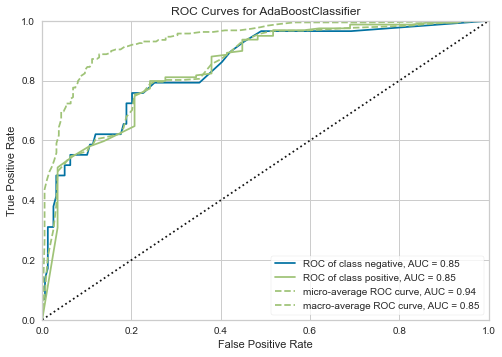

In [163]:
plot_model(best_model, plot="auc")

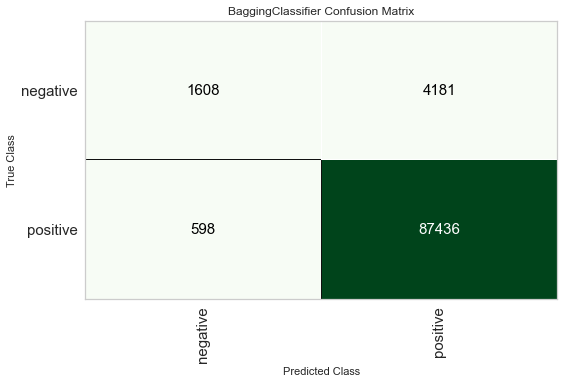

In [238]:
plot_model(best_model, plot="confusion_matrix")

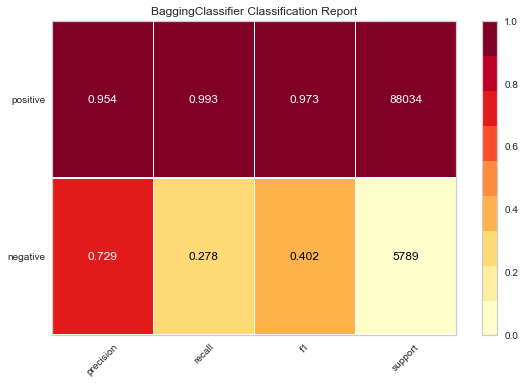

In [239]:
plot_model(best_model, plot="class_report")

In [241]:
final_model = finalize_model(best_model)

In [242]:
predict_unseen = predict_model(final_model, data=new_test_df);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0,0.9164,0,0,0,0,0


In [243]:
predict_unseen

,review_rating_score,summary_rating_score,length_summary,length_review,derived_ratings,Label,Score
27594,0.8674,0.0000,23,358,positive,positive,0.9563
11064,0.0000,0.0000,13,102,positive,positive,0.8788
135854,-0.4767,0.6124,38,43,positive,positive,0.9568
1918,0.9430,0.0000,10,340,positive,positive,0.9844
278960,0.8472,0.6249,27,127,positive,positive,0.9965
...,...,...,...,...,...,...,...
442239,0.8680,0.4404,52,309,positive,positive,0.9784
94317,0.9645,-0.2960,15,439,positive,positive,0.8736
238078,0.9147,0.6696,19,275,positive,positive,0.9968
306396,-0.3744,0.6369,15,1237,positive,positive,0.9810


In [244]:
save_model(final_model,"deployment_pycaret_NLTK_04072022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='derived_ratings',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                                                                              min_weight_fraction_leaf=0.0,
                                                                              n_estimators=300,
                               

In [247]:
load_model("deployment_pycaret_NLTK_04072022")

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='derived_ratings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nume...
                                                                             min_weight_fraction_leaf=0.0,
                                                                             n_estimators=300,
                                               